<a href="https://colab.research.google.com/github/Meidyt/Tugas5DTI/blob/main/Multiple%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresi**


Analisis Regresi adalah salah satu tool untuk membangun model statistika dimana dari analisis ini dapat diketahui hubungan antara variable independent dan dependentnya. 

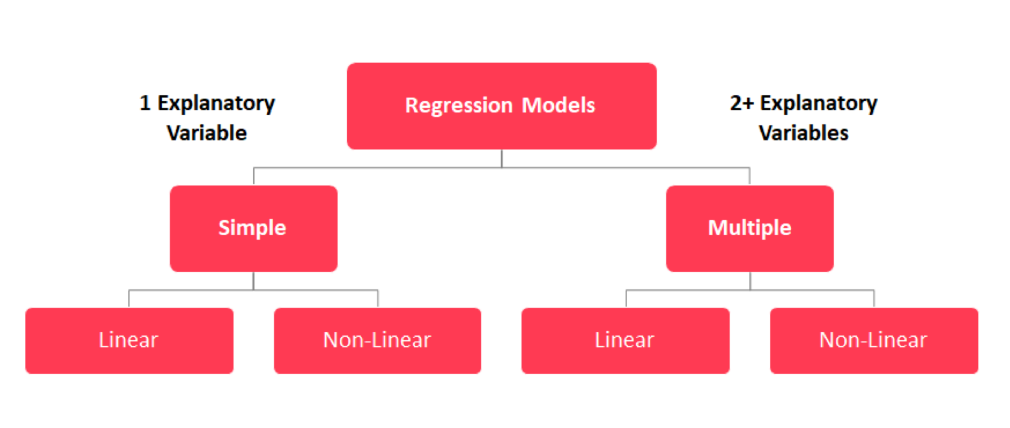

Pada kali ini, kita berfokus terhadap multiple regression dimana pada multiple regression terdapat beberapa variabel x dan 1 variable y dan melakukan analisis regresi ini dengan python. 


Pada python sendiri, terdapat beberapa library yang digunakan dimana library ini akan berguna untuk melakukan analisis regresi dengan python seperti:

*  Pandas (untuk menginput dan menampilkan dataset dalam format csv)
*  Numpy (untuk menampilkan visualisasi linear regresi)
*  Statsmodels (untuk analisis statistik)
*  matplotlib (untuk visualisasi data)
*  Seaborn (untuk visualisasi data)
*  Sklearn (untuk membangun model Multiple linear Regression)

Untuk kasus pada analisis multiple regression ini, pertama-tama kita import semua library yang kita butuhkan

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')




---



Lalu selanjutnya adalah mengimport dataset yang akan digunakan 

In [3]:
#Melakukan import dataset
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0




---



Selanjutnya adalah menampilkan visualisasi data untuk melihat sebaran data dengan menggunakan scatter plot. 

Text(0.5, 0, 'pie sales')

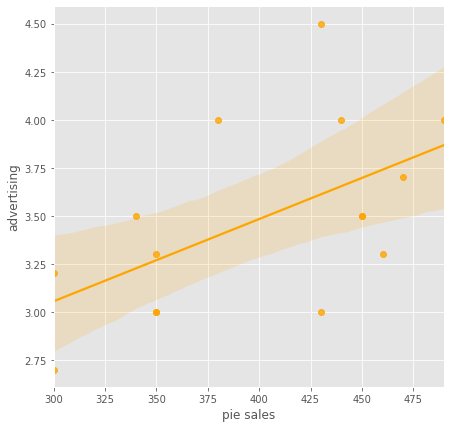

In [16]:
#Menampilkan plot dengan seaborn
sns.regplot(x=df.pie_sales, y=df.advertising, color='orange')
plt.xlabel('pie sales')


Text(0, 0.5, 'Price')

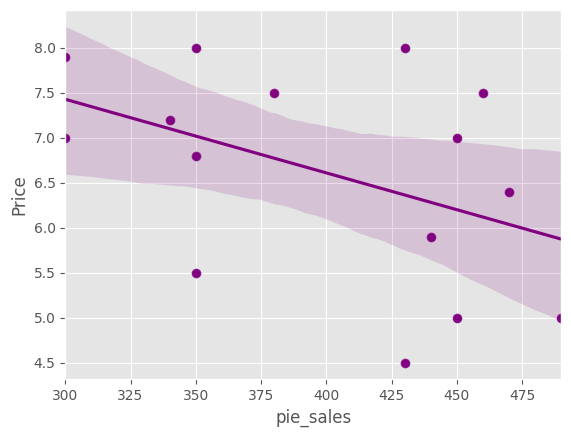

In [65]:
sns.scatterplot(x="pie_sales", y="price", color='purple', data= df)
sns.regplot(x=df.pie_sales, y=df.price, color='Purple')
plt.ylabel('Price')

dari visualisasi data tersebut dapat dilihat koreasinya, dimana hubungan advertising dan pie_sales adalah berkorelasi positif, dan price dengan pie_sales berkorelasi negatif. 

---





Modelling Multiple Regression Analysis dengan sklearn


In [76]:
#Mendefiniskan variabel sebelum dimodelkan
X_variable = ['week', 'advertising', 'price']
y_variable = ['pie_sales']
X = df[X_variable]
y = df[y_variable]
display(X.head())
display(y.head())

,week,advertising,price
0,1,3.3,5.5
1,2,3.3,7.5
2,3,3.0,8.0
3,4,4.5,8.0
4,5,3.0,6.8


,pie_sales
0,350
1,460
2,350
3,430
4,350


Memasuki tahapan pemodelan dengan Sklearn

In [68]:
# dengan Sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [306.52619328]
Coefficients: 
 [[-24.97508952  74.13095749]]


In [74]:
regr = linear_model.LinearRegression()
regr.fit(x, y)


print('Predicted pie sales: \n', regr.predict([[5.50, 3.5]]))

Predicted pie sales: 
 [[428.62155215]]


Membuat prediksi dengan Sklearn

In [75]:
# Prediksi dengan Sklearn
new_price = 4.2
new_advertising = 7.5
print ('Predicted pie sales: \n', regr.predict([[new_price, new_advertising]]))

Predicted pie sales: 
 [[757.61299847]]




---



Regresi dengan Statmodels

In [72]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     4.398
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0290
Time:                        07:59:52   Log-Likelihood:                -77.126
No. Observations:                  15   AIC:                             162.3
Df Residuals:                      11   BIC:                             165.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         339.7966    124.282      2.734      